In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

odds ratio = P / (1 - P)   
logit(P) = log(odds ratio) =log P / (1 - P)  
sigmoid = 1 / (1+exp(-z)), z = WX

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [5]:
z = np.arange(-7, 7, 0.1)

In [6]:
phi_z = sigmoid(z)

In [7]:
phi_z

array([9.11051194e-04, 1.00677082e-03, 1.11253603e-03, 1.22939862e-03,
       1.35851995e-03, 1.50118226e-03, 1.65880108e-03, 1.83293894e-03,
       2.02532039e-03, 2.23784852e-03, 2.47262316e-03, 2.73196076e-03,
       3.01841632e-03, 3.33480731e-03, 3.68423990e-03, 4.07013772e-03,
       4.49627316e-03, 4.96680165e-03, 5.48629890e-03, 6.05980149e-03,
       6.69285092e-03, 7.39154134e-03, 8.16257115e-03, 9.01329865e-03,
       9.95180187e-03, 1.09869426e-02, 1.21284350e-02, 1.33869178e-02,
       1.47740317e-02, 1.63024994e-02, 1.79862100e-02, 1.98403057e-02,
       2.18812709e-02, 2.41270214e-02, 2.65969936e-02, 2.93122308e-02,
       3.22954647e-02, 3.55711893e-02, 3.91657228e-02, 4.31072549e-02,
       4.74258732e-02, 5.21535631e-02, 5.73241759e-02, 6.29733561e-02,
       6.91384203e-02, 7.58581800e-02, 8.31726965e-02, 9.11229610e-02,
       9.97504891e-02, 1.09096821e-01, 1.19202922e-01, 1.30108474e-01,
       1.41851065e-01, 1.54465265e-01, 1.67981615e-01, 1.82425524e-01,
      

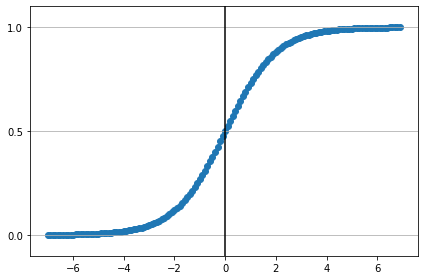

In [14]:
plt.scatter(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1,1.1)

plt.yticks([0.0,0.5,1.0])

ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()

In [15]:
#로지스틱 비용함수

def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1 - sigmoid(z))

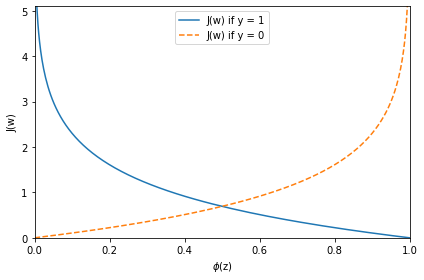

In [20]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c1, label = 'J(w) if y = 1')
plt.plot(phi_z, c0, label = 'J(w) if y = 0', linestyle = '--')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

plt.legend(loc = 'best')
plt.tight_layout()

In [41]:
class LogisticRegressionGD(object):
    def __init__(self, eta = 0.05, n_iter = 100, random_state = 42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = (-y.dot(np.log(output))) - (1 - y).dot(np.log(1 - output))
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1.0 / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1.0, 0.0)

In [44]:
from sklearn import datasets

iris = datasets.load_iris()

In [45]:
X = iris.data[:,[2,3]]
y = iris.target

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [59]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, clf, res = 0.02, test_idx = None):
    
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, res),
                           np.arange(x2_min, x2_max, res))
    
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = .3, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                   y = X[y==cl,1], 
                   alpha = .8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],
                    facecolors = 'none', edgecolor = 'black', alpha = 1.0, 
                    linewidths = 1, marker = 'o', s = 100, label = 'test set'
                   )
        

Text(0, 0.5, 'petal width')

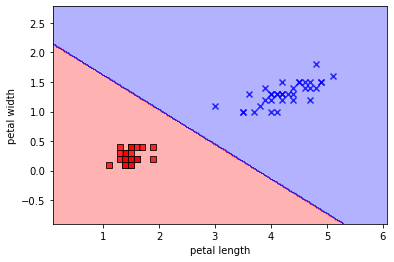

In [60]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, clf = lrgd)

plt.xlabel('petal length')
plt.ylabel('petal width')

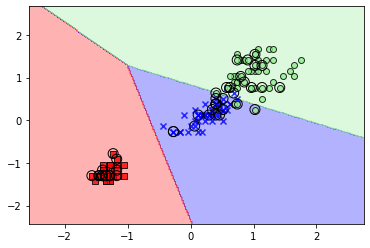

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 100.0, random_state = 42)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std, clf = lr, test_idx = range(105,150))

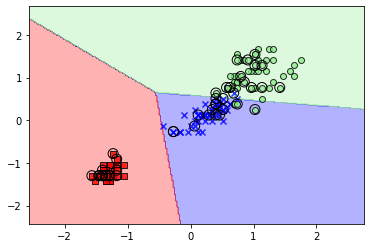

In [63]:
lr2 = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 10.0, random_state = 42)
lr2.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std, clf = lr2, test_idx = range(105,150))

In [64]:
lr.predict_proba(X_test_std[:3,:])

array([[2.35280494e-08, 4.41857926e-01, 5.58142050e-01],
       [9.63790688e-05, 9.43978445e-01, 5.59251763e-02],
       [9.85909459e-06, 6.61058399e-01, 3.38931742e-01]])

In [65]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis = 1)

array([2, 1, 1], dtype=int64)

In [72]:
lr.predict_proba(X_test_std[0,:])

ValueError: Expected 2D array, got 1D array instead:
array=[1.41660741 0.76797223].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [73]:
lr.predict_proba(X_test_std[0,None])

array([[2.35280494e-08, 4.41857926e-01, 5.58142050e-01]])

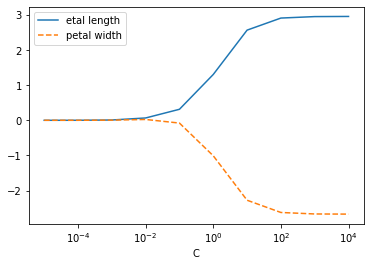

In [77]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 10.**c)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'etal length')
plt.plot(params, weights[:,1], linestyle = '--', label = 'petal width')
plt.legend(loc = 'best')
plt.xlabel('C')
plt.xscale('log')
plt.show()

In [76]:
lr

LogisticRegression(C=1e-05, solver='liblinear')

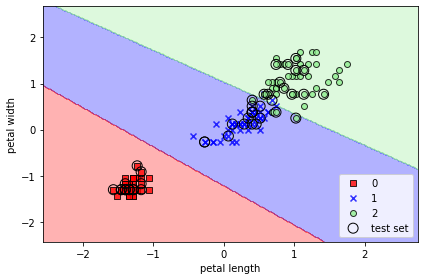

In [79]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std, clf = svm, test_idx = range(105,150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'lower right')
plt.tight_layout()


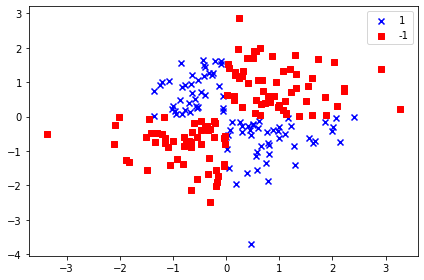

In [84]:
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                      X_xor[:,1]>0)

y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c = 'b',
           marker = 'x',
           label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1],
           c = 'r',
           marker = 's',
           label = '-1')

plt.legend(loc = 'best')
plt.tight_layout()

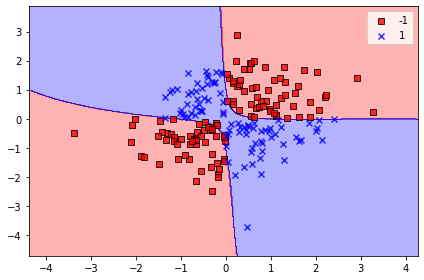

In [85]:
svm = SVC(kernel = 'rbf', random_state = 42, gamma = 0.1, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, clf= svm)
plt.legend(loc = 'best')
plt.tight_layout()

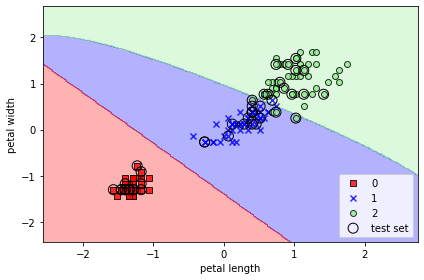

In [86]:
svm = SVC(kernel = 'rbf', random_state = 42, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, clf = svm, test_idx = range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'lower right')
plt.tight_layout()

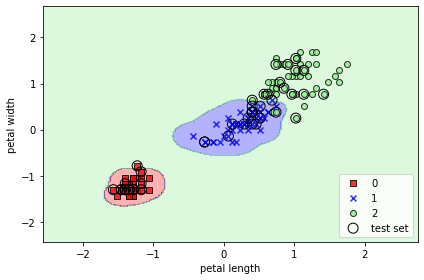

In [88]:
svm = SVC(kernel = 'rbf', random_state = 42, gamma = 20, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, clf = svm, test_idx = range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'lower right')
plt.tight_layout()

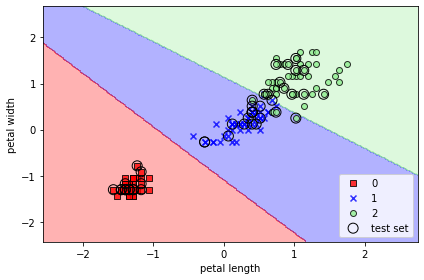

In [89]:
svm = SVC(kernel = 'rbf', random_state = 42, gamma = 0.01, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, clf = svm, test_idx = range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'lower right')
plt.tight_layout()